# <center> <u> Initial Value Problems </u> </center> 

## 1. <u> FTCS Method </u>

#### - Euler Based Numerical Algorithm 

## 2. <u> Numerical Instability </u> 

#### - 

## 3. <u> Implicit Method </u>

#### - 

## 4. <u> Crank Nicolson Method </u>  

## 5. <u> Spectral Method </u> 

In [1]:
import numpy as np
from numba import jit

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (12, 6))

## <center> Diffusion Equation </center> 

## <center> $ \frac{\partial \phi}{\partial t} = D \frac{\partial^{2} \phi}{\partial x^{2}} $ </center>

## <center> Forward Time Centered Space Method </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial x^{2}} = \frac{\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)}{a^{2}} $ </center> 

## <center> $ \frac{\partial \phi}{\partial t} = \frac{D}{a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] $ </center>

## <center> Applying Euler Scheme </center> 

## <center> $ \phi(x, t + h) = \phi(x, t) + h \frac{D}{a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] $ </center>

In [3]:
@jit(nopython = True)
def forward_time_centered_space_method(tau):
    """
    Solves the Heat Equation with FTCS Method 
    """
    
    L = 0.01
    D = 4.25e-6
    N = 100
    a = L / N
    h = 1e-4
    epsilon = h / 1000
    
    t_low = 0
    t_mid = 20
    t_high = 50

    T = np.zeros(N + 1, dtype = float)
    T[0] = t_high
    T[N] = t_low
    T[1:N] = t_mid
    
    Tp = np.zeros(N + 1, dtype = float)
    Tp[0] = t_high
    Tp[N] = t_low

    t = 0
    c = h * D / (a**2)

    while t < tau:

        for i in range(1, N):
            Tp[i] = T[i] + c * (T[i + 1] + T[i - 1] - 2 * T[i])
        
        T, Tp = Tp, T
        t += h

    return T

In [4]:
tau = np.array([0.01, 0.1, 0.4, 1.0, 10.0])
df = pd.DataFrame()

for t in tau:
    df[t] = forward_time_centered_space_method(t)

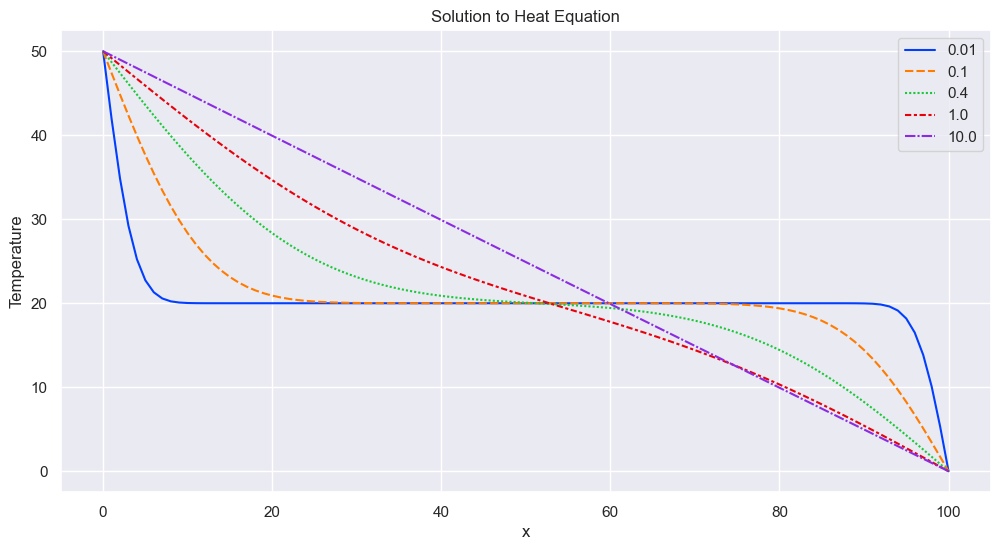

In [9]:
ax = sns.lineplot(
   df,
)

ax.set(
    title = "Solution to Heat Equation",
    xlabel = "x",
    ylabel = "Temperature",
)

plt.show()

## <center> Numerical Stability </center> 

## <center> Wave Equation </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial t^{2}} = v^{2} \frac{\partial^{2} \phi}{\partial x^{2}} $ </center>

## <center> Forward Time Centered Space Method </center> 

## <center> $ \frac{\partial^{2} \phi}{\partial t^{2}} = \frac{v^{2}}{a^{2}} \phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t) $ </center> 

## <center> $ \frac{\partial \phi}{\partial t} = \psi(x, t) $ </center>

## <center> $ \frac{\partial \psi}{\partial t} = \frac{v^{2}}{a^{2}} \phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t) $ </center> 

## <center> Apply Euler Scheme </center> 

## <center> $ \phi(x, t + h) = \phi(x, t) + h \psi(x, t) $ </center> 

## <center> $ \psi(x, t + h) = \psi(x, t) + h \frac{v^{2}}{a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] $ </center>

In [10]:
@jit(nopython = True)
def numerical_instability():
    """
    Solves the Wave Equation with FTCS
    """
    
    

    return 0

## <center> Implicit Method </center> 

## <center> Backwards </center> 

## <center> $ \phi(x, t - h) = \phi(x, t) - h \psi(x, t) $ </center>

## <center> $ \psi(x, t - h) = \psi(x, t) - h \frac{v^{2}}{a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] $ </center>

## <center> Forwards </center> 

## <center> $ \phi(x, t + h) - h \psi(x, t + h) = \phi(x, t) $ </center>

## <center> $ \psi(x, t + h) - h \frac{v^{2}}{a^{2}} [\phi(x + a, t + h) + \phi(x - a, t + h) - 2 \cdot \phi(x, t + h)] = \psi(x, t) $ </center>

In [ ]:
@jit(nopython = True)
def implicit_method():
    """

    """
    
    
    
    return 0

## <center> Crank Nicolson Method </center> 

## <center> $ \phi(x, t + h) - \frac{1}{2} h \psi(x, t + h) = \phi(x, t) + \frac{1}{2} h \psi(x, t)  $ </center> 

### <center> $ \phi(x, t + h) - \frac{hv^{2}}{a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] = \phi(x, t) + \frac{hv^{2}}{2a^{2}} [\phi(x + a, t) + \phi(x - a, t) - 2 \cdot \phi(x, t)] $ </center> 


## <center> <u> Schrodinger Equation </u> </center> 

## <center> $ -\frac{\hbar}{2M} \frac{\partial^{2} \psi}{\partial x^{2}} = i \hbar \frac{\partial \psi}{\partial t}$ </center>

## <center> FTCS Method </center>

## <center> $ \psi(x, t + h) = \psi(x, t) + h \frac{i \hbar}{2ma^{2}} [\psi(x + a, t) + \psi(x - a, t) - 2 \cdot \psi(x, t)] $ </center>

## <center> Implicit Method </center>

## <center> $ \psi(x, t) = \psi(x, t + h) - h \frac{i \hbar}{2ma^{2}} [\psi(x + a, t + h) + \psi(x - a, t + h) - 2 \cdot \psi(x, t + h)] $ </center>

## <center> Crank Nicolson Method </center>

## <center> </center> 